<a href="https://colab.research.google.com/github/Aditya9015/demo/blob/main/full%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Random Forest Evaluation Metrics:
      Metric    Score
0   Accuracy  97.3000
1  Precision  97.3700
2     Recall  97.3700
3   F1 Score  97.3700
4        MCC  94.5906


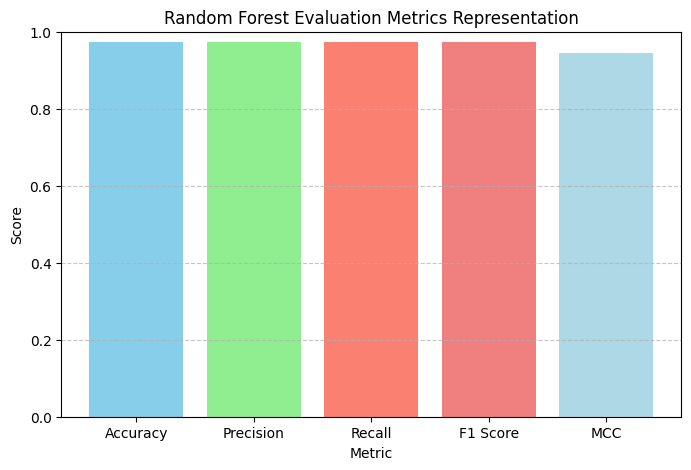

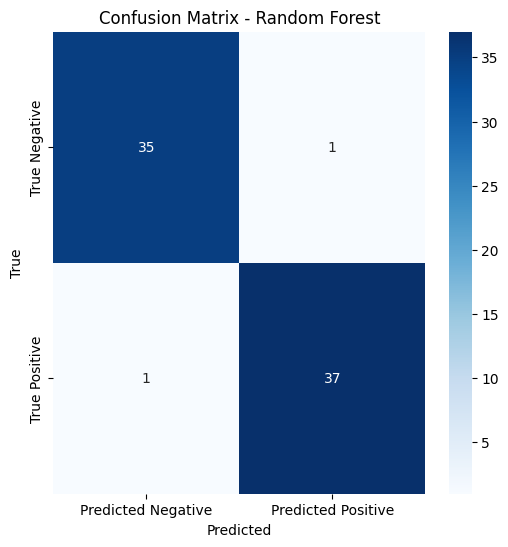

In [1]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)


# 2. Load and preprocess
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# 3. Hyperparameter Grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt']
}

# 4. GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1_macro', verbose=0)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_

# Predictions
y_pred_rf = best_rf.predict(X_test)

# 5. Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='binary')
recall_rf = recall_score(y_test, y_pred_rf, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Results Table
results_rf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_rf * 100, 2), round(precision_rf * 100, 2),
              round(recall_rf * 100, 2), round(f1_rf * 100, 2), round(mcc_rf * 100, 4)]
})

print("Random Forest Evaluation Metrics:")
print(results_rf)

# Bar Chart
metrics_rf = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_rf = results_rf['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_rf, scores_rf, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Random Forest Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')

plt.savefig("confusion_matrix_RandomForest.png", dpi=300)

plt.show()



Fitting 5 folds for each of 40 candidates, totalling 200 fits
SVM Evaluation Metrics 
      Metric    Score
0   Accuracy   98.650
1  Precision   97.440
2     Recall  100.000
3   F1 Score   98.700
4        MCC   97.329


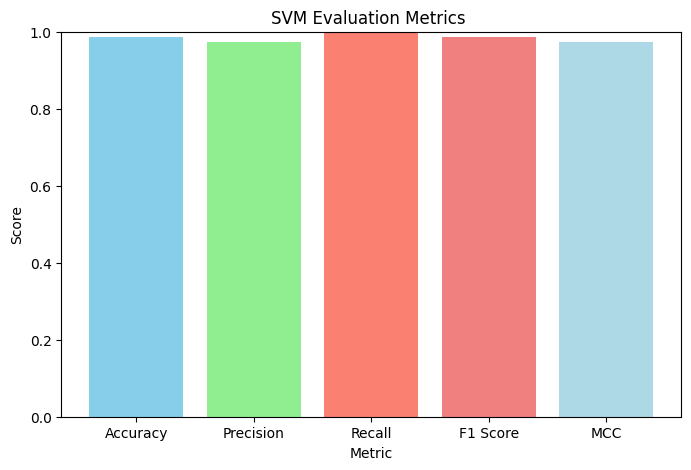

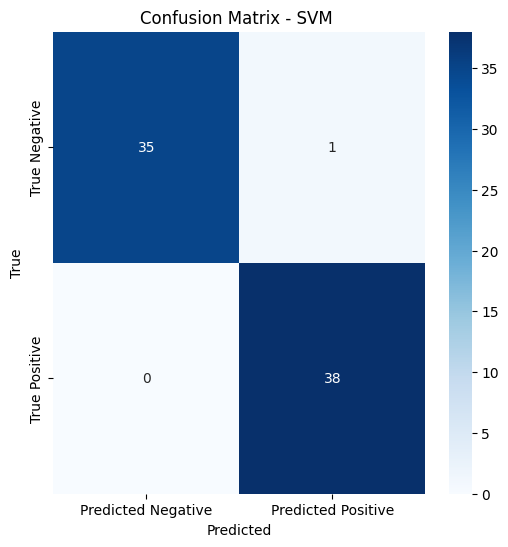

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Download data from URL
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

# Read dataset
df = pd.read_csv('data.csv')

# Separate features and target
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train-Test Split (no PCA now)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# SVM Hyperparameter Grid
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['poly'], 'degree': [2, 3, 4]},
    {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.1, 1]},
]

# GridSearchCV for best SVM
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_macro', verbose=1)
grid.fit(X_train, y_train)

# Best model
best_model = grid.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print Results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc * 100, 4)]
})

print("SVM Evaluation Metrics ")
print(results)

# Bar Chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('SVM Evaluation Metrics ')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM ')
plt.savefig("confusion_matrix_SVM.png", dpi=300)
plt.show()

XGBoost Evaluation Metrics 
      Metric     Score
0   Accuracy   95.9500
1  Precision  100.0000
2     Recall   92.1100
3   F1 Score   95.8900
4        MCC   92.2064


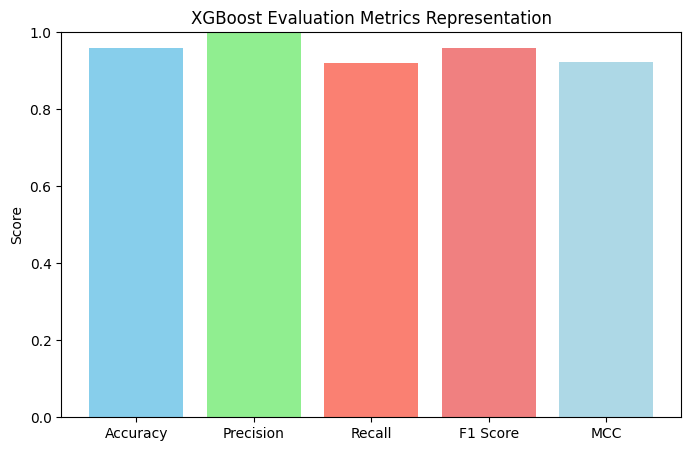

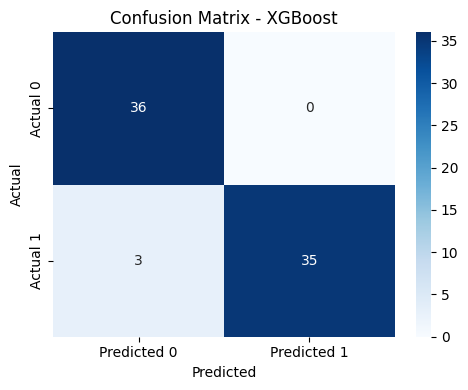

In [3]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from xgboost import XGBClassifier

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)

# Feature/Target separation
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)



# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', verbose=0)
grid_xgb.fit(X_train, y_train)

# Best model & prediction
best_xgb_model = grid_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test)


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)



results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc*100, 4)]
})

print("XGBoost Evaluation Metrics ")
print(results)

# Data for the chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100
# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('XGBoost Evaluation Metrics Representation')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("confusion_matrix_xgboost.png", dpi=300)
plt.show()

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
Best CV Accuracy: 92.27%
KNN Evaluation Metrics:
      Metric     Score
0   Accuracy   97.3000
1  Precision  100.0000
2     Recall   94.5900
3   F1 Score   97.2200
4        MCC   94.7331


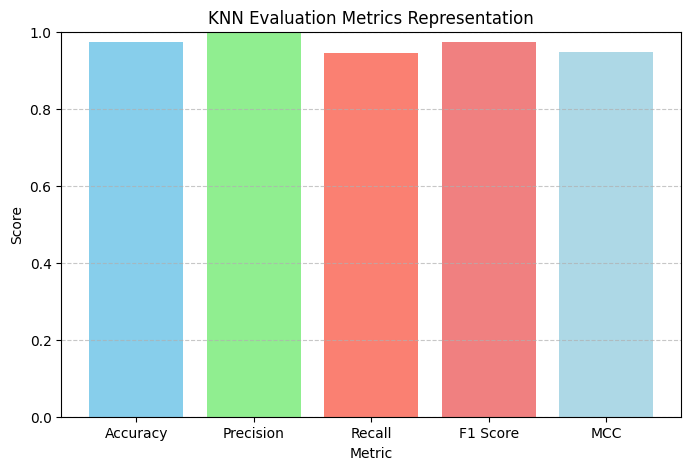

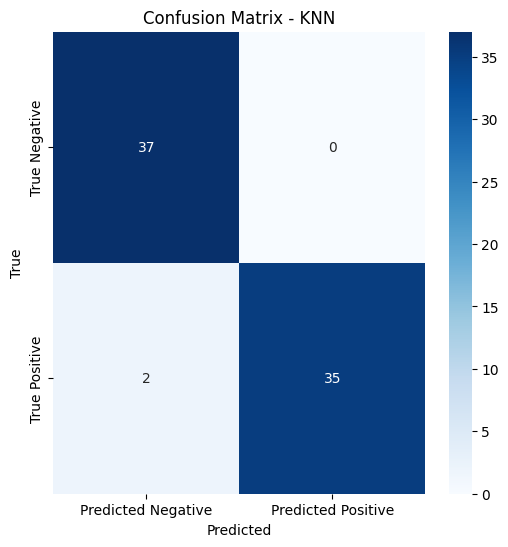

In [4]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  # Add this import

# 1. Load dataset from UCI
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

df = pd.read_csv('data.csv')

# 2. Preprocess
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Scaling before SMOTE
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE (Apply after scaling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

# 4. GridSearchCV to find best 'k' (number of neighbors)
param_grid = {
    'n_neighbors': list(range(4, 21)),  # Try K from 4 to 20
    'weights': ['uniform', 'distance'],  # Try both weighting strategies
    'metric': ['euclidean']  # Optional: can try others like 'manhattan' too
}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)

# 5. Best parameters
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy: {:.2f}%".format(grid.best_score_ * 100))

# 6. Evaluate on the test set using best estimator
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)

# Store results in DataFrame
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2),
              round(recall * 100, 2), round(f1 * 100, 2), round(mcc * 100, 4)]
})

# Print performance table
print("KNN Evaluation Metrics:")
print(results)

# Bar Chart for performance metrics
plt.figure(figsize=(8, 5))
scores = results['Score'].values / 100  # Convert to 0-1 scale for plotting
plt.bar(results['Metric'], scores,
        color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])

plt.title('KNN Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.savefig("confusion_matrix_knn.png", dpi=300)
plt.show()

Decision Tree Evaluation Metrics:
      Metric    Score
0   Accuracy  95.9500
1  Precision  97.3000
2     Recall  94.7400
3   F1 Score  96.0000
4        MCC  91.9255


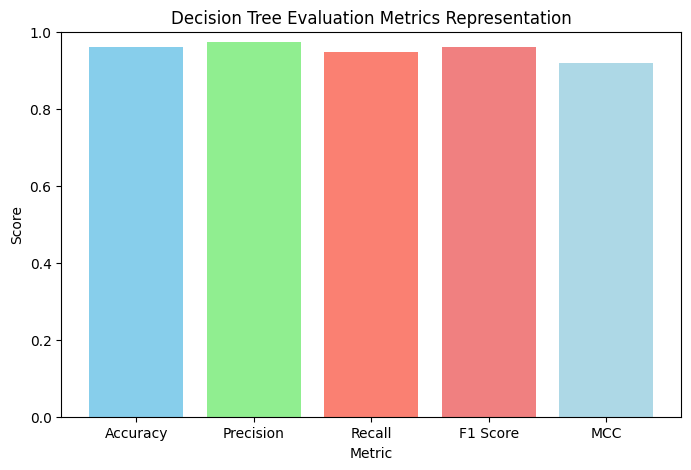

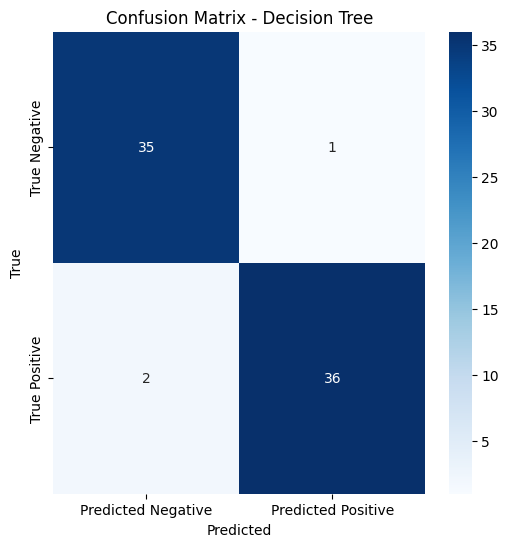

In [5]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV for Decision Tree
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='f1_macro', verbose=0)
grid_dt.fit(X_train, y_train)

# Best model
best_dt = grid_dt.best_estimator_

# Predictions
y_pred_dt = best_dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_pred_dt, average='binary')
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display results in table
results_dt = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_dt * 100, 2), round(precision_dt * 100, 2), round(recall_dt * 100, 2), round(f1_dt * 100, 2), round(mcc_dt*100, 4)]
})

print("Decision Tree Evaluation Metrics:")
print(results_dt)

# Bar chart
metrics_dt = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_dt = results_dt['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_dt, scores_dt, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Decision Tree Evaluation Metrics Representation')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.savefig("confusion_matrix_dt.png", dpi=300)
plt.show()


Logistic Regression Evaluation Metrics:
      Metric    Score
0   Accuracy  83.7800
1  Precision  82.5000
2     Recall  86.8400
3   F1 Score  84.6200
4        MCC  67.5956


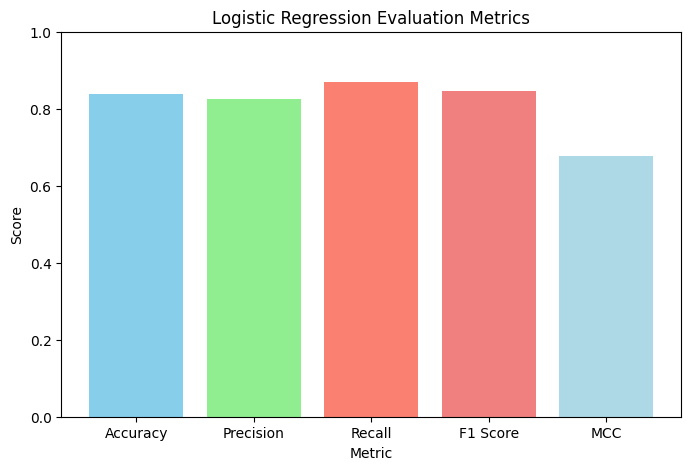

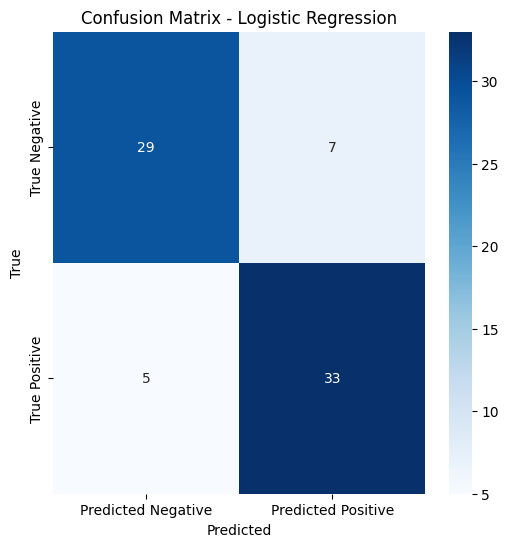

In [6]:
import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
# Import the requests module
import requests # This line was added to import the requests module.
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


# Downloading Content From URL & Storing Into Local File
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')

X = df.drop(['name', 'status'], axis=1)  # 'name' is an identifier, drop it
y = df['status']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Apply SMOTE first
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 4. Model Training with GridSearchCV for SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter Grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'penalty': ['l2'],               # Only 'l2' penalty is supported by solver 'lbfgs'
    'solver': ['lbfgs']               # Optimizer
}

# GridSearchCV for Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), param_grid_lr, cv=5, scoring='f1_macro', verbose=0)
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_

# Predictions
y_pred_lr = best_lr.predict(X_test)

# Evaluation Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='binary')
recall_lr = recall_score(y_test, y_pred_lr, average='binary')
f1_lr = f1_score(y_test, y_pred_lr, average='binary')
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display results in table
results_lr = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy_lr * 100, 2), round(precision_lr * 100, 2), round(recall_lr * 100, 2), round(f1_lr * 100, 2), round(mcc_lr*100, 4)]
})

print("Logistic Regression Evaluation Metrics:")
print(results_lr)

# Bar chart
metrics_lr = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores_lr = results_lr['Score'].values / 100

plt.figure(figsize=(8, 5))
plt.bar(metrics_lr, scores_lr, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.title('Logistic Regression Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig("confusion_matrix_LR.png", dpi=300)
plt.show()


=== Model Evaluation Comparison Table ===

                     Accuracy  Precision  Recall  F1 Score    MCC
Random Forest           97.30      97.37   97.37     97.37  94.59
SVM                     98.65      97.44  100.00     98.70  97.33
XGBoost                 95.95     100.00   92.11     95.89  92.21
KNN                     97.30     100.00   94.59     97.22  94.73
Decision Tree           95.95      97.30   94.74     96.00  91.93
Logistic Regression     83.78      82.50   86.84     84.62  67.60


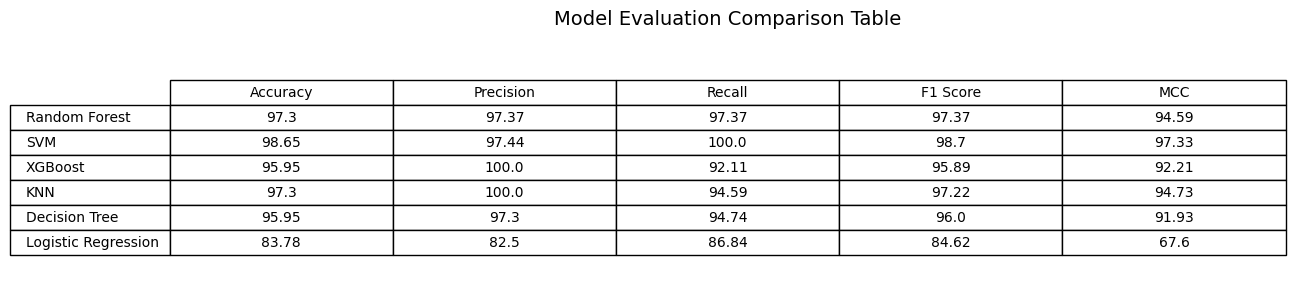

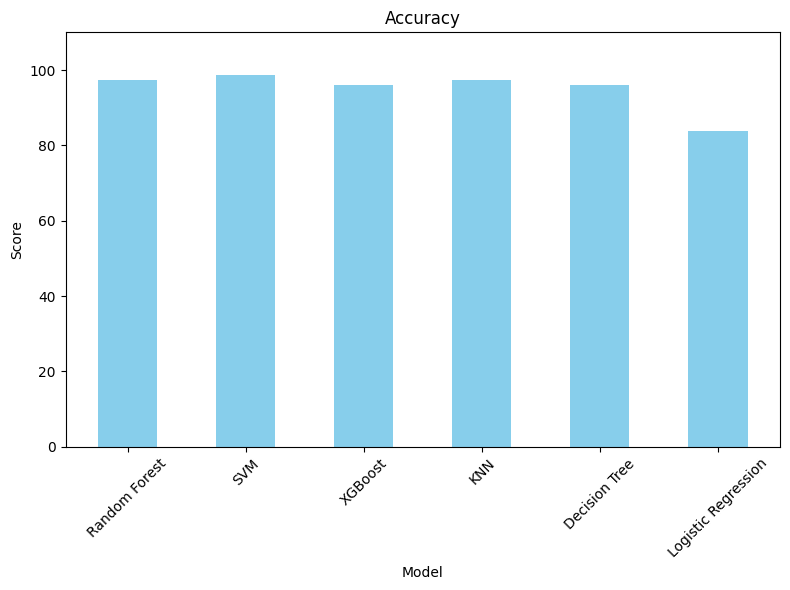

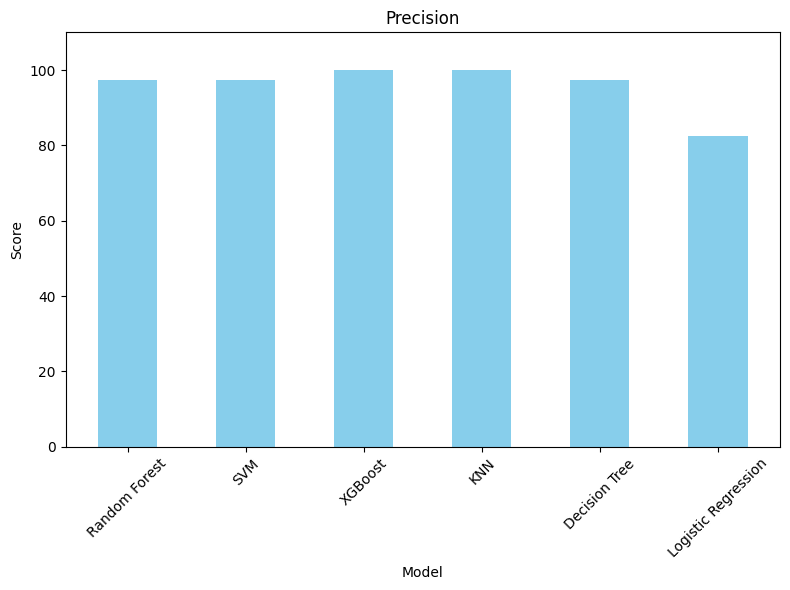

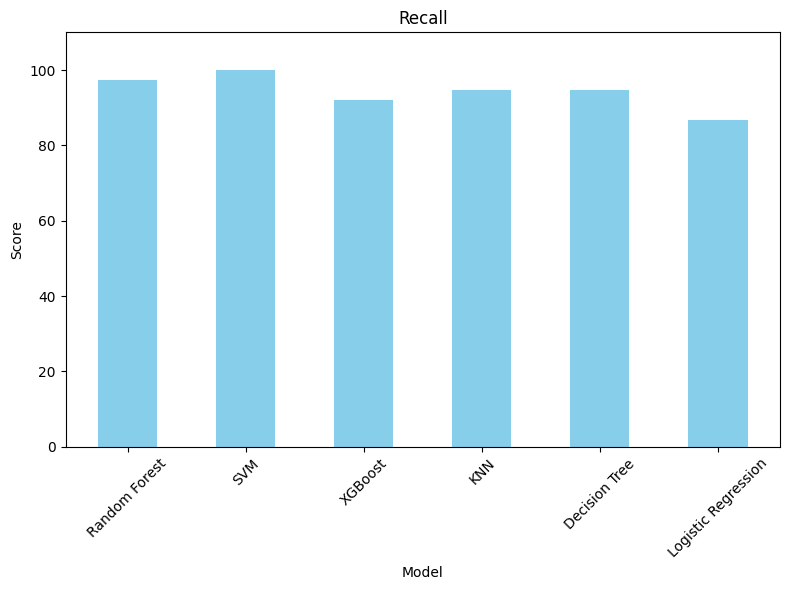

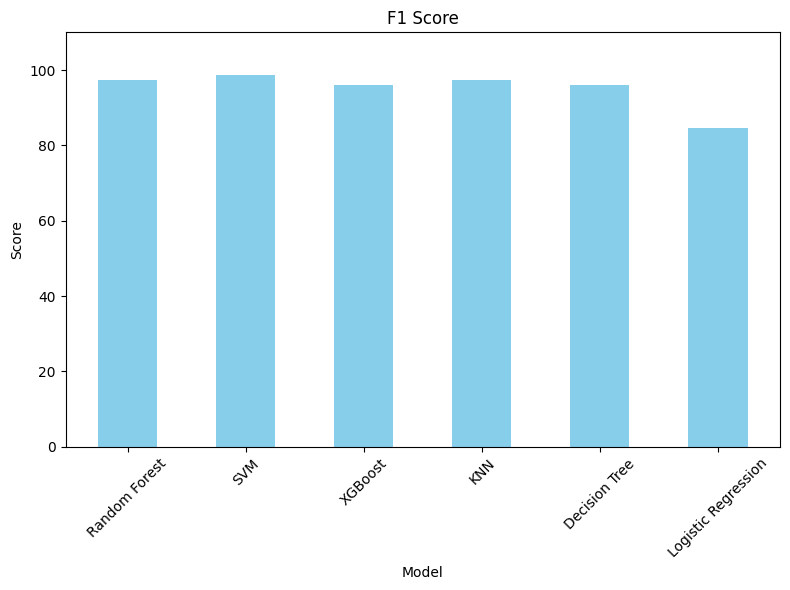

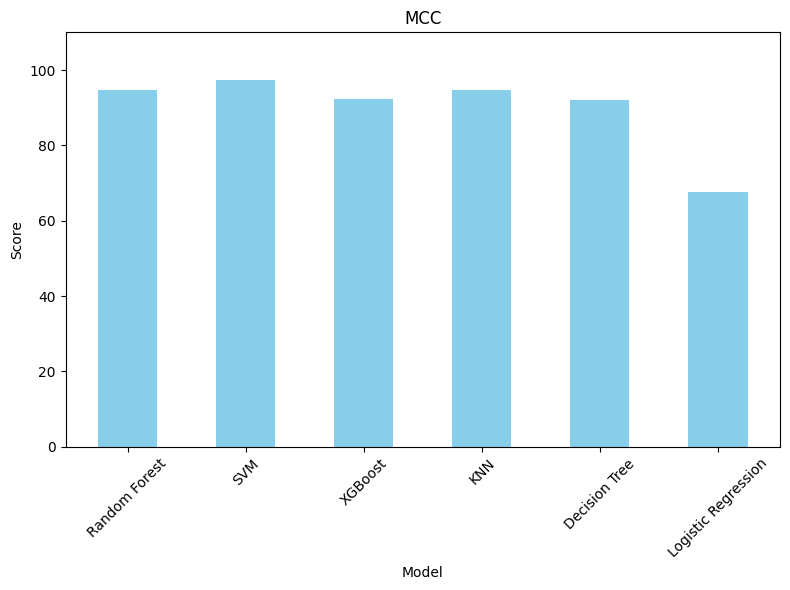

All images and the comparison table have been saved and displayed.


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data setup
models = ['Random Forest', 'SVM', 'XGBoost', 'KNN', 'Decision Tree', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']

scores = {
    'Random Forest': [97.3, 97.37, 97.37, 97.37, 94.5906],
    'SVM': [98.65, 97.44, 100.0, 98.7, 97.329],
    'XGBoost': [95.95, 100.0, 92.11, 95.89, 92.2064],
    'KNN': [97.3, 100.0, 94.59, 97.22, 94.7331],
    'Decision Tree': [95.95, 97.3, 94.74, 96.0, 91.9255],
    'Logistic Regression': [83.78, 82.5, 86.84, 84.62, 67.5956]
}

# Convert to DataFrame
df_scores = pd.DataFrame(scores, index=metrics).T
print("\n=== Model Evaluation Comparison Table ===\n")
print(df_scores.round(2))  # Display rounded table in console

# Plot comparison table
fig, ax = plt.subplots(figsize=(12, 3))
ax.axis('off')  # Turn off the axis

# Table content and display
table = ax.table(cellText=df_scores.round(2).values,
                 colLabels=df_scores.columns,
                 rowLabels=df_scores.index,
                 cellLoc='center',
                 loc='center')

table.scale(1.2, 1.5)  # Adjust table size
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title("Model Evaluation Comparison Table", fontsize=14, pad=20)

plt.savefig("Evaluation_Comparison_Table.png")
plt.show()

# Bar chart for each metric
bar_width = 1
spacing = 2
score_array = np.array([scores[model] for model in models])

for i, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(8, 6))
    x_pos = np.arange(len(models)) * spacing
    ax.bar(x_pos, score_array[:, i], width=bar_width, color='skyblue')

    ax.set_title(f'{metric}')
    ax.set_ylim([0, 110])
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models, rotation=45)

    plt.tight_layout()
    plt.savefig(f'{metric}_comparison.png')
    plt.show()
    plt.close()

print("All images and the comparison table have been saved and displayed.")
